# Tutorial: K-Nearest Neighbors (K-NN)

In this tutorial, you will be building a simple classifier using K-NN model that will attempt to classify whether a person  will purchase our product when targeted by social network advertisements

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.shape

(400, 3)

In [ ]:
df.head(20)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


# Visualising the dataset

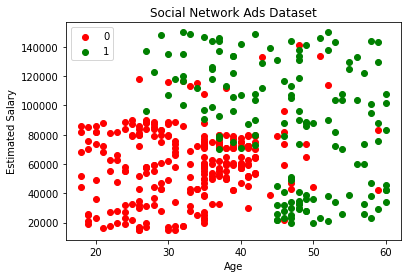

In [ ]:
plt.scatter(X[y == 0]["Age"], X[y == 0]["EstimatedSalary"], c = 'red', label = 0)
plt.scatter(X[y == 1]["Age"], X[y == 1]["EstimatedSalary"], c = 'green', label = 1)
plt.title('Social Network Ads Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

## Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)

KNeighborsClassifier()

## Predicting a new result

## Predicting the Test set results

In [ ]:
X_test

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
y_test

## Simple Evaluation Metric: Accuracy

In [ ]:
(y_pred == y_test).sum() / y_test.shape[0]

0.93

## Deeper Evaluation Metric: Confusion Matrix

accuracy:  0.93


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


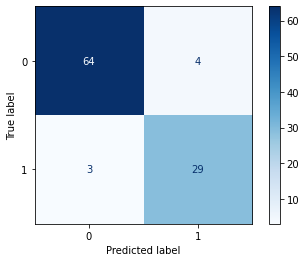

In [ ]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
cm = plot_confusion_matrix(classifier,X_test, y_test,cmap="Blues");
print("accuracy: ", accuracy_score(y_test, y_pred))

## Visualising the Training set/Test set results

Below are some codes to visualize the training and test set results. **This takes approximately 10 minutes to run on Google Colab.**

### Training Set result

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


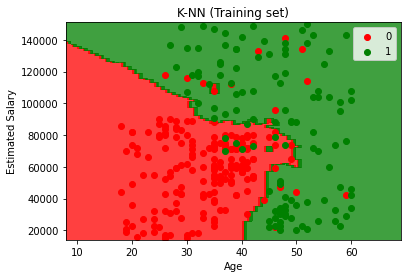

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors=['red','green']
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set result

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


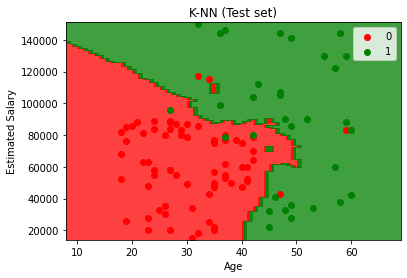

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()